# Install pedsuite

In [81]:
R.version

               _                           
platform       x86_64-conda-linux-gnu      
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          2.0                         
year           2022                        
month          04                          
day            22                          
svn rev        82229                       
language       R                           
version.string R version 4.2.0 (2022-04-22)
nickname       Vigorous Calisthenics       

In [2]:
pedsuite = c("pedtools", "ribd", "ibdsim2", "pedprobr",
"forrel", "pedbuildr", "paramlink2",
"segregatr")

In [3]:
install.packages(pedsuite)

In [4]:
url = "https://magnusdv.github.io/pedinr/datasets/data.zip"
download.file(url, destfile = "data.zip")
unzip("data.zip")

# Notebook start

In [1]:
library(pedprobr)

Le chargement a nécessité le package : pedtools



## Bob Johnson's case

Bennett 2010, p. 317-320, Fig. A.2.

Father: Creating new individual with ID = 5

Father: Creating new individual with ID = 8

Father: Creating new individual with ID = 11

Father: Creating new individual with ID = 13



[1] 3.999984e-06

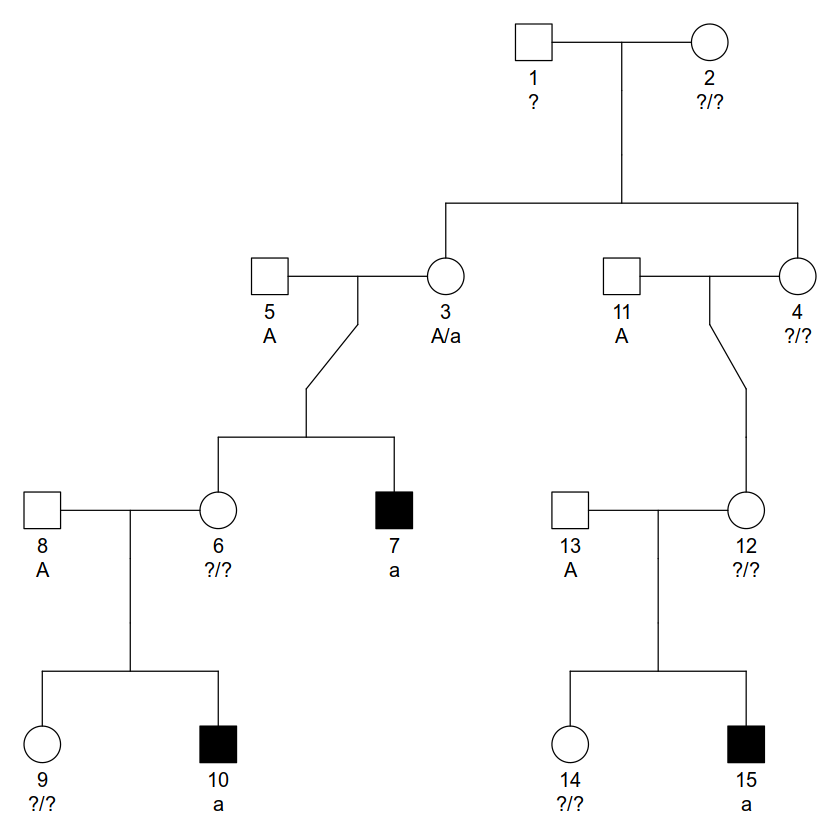

In [2]:
# Pedigree and marker
w = nuclearPed(2, sex = 2)
x = addChildren(w, mo = 3, nch = 1, sex = 2)
y = addSon(x, c(3, 5))
z = addChildren(y, mo = 6, nch = 1, sex = 2)
a = addSon(z, c(6, 8))
b = addChildren(a, mo = 4, nch = 1, sex = 2)
c = addChildren(b, mo = 12, nch = 1, sex = 2)
d = addSon(c, c(12, 13))

# Affected members
aff = c(7, 10, 15)
m = marker(d, chrom='X', geno = c(NA, NA, "A/a", NA, "A", NA, "a", "A", NA, "a", "A", NA, "A", NA, "a"),
              afreq = c(a = 1/500000, A = 499999/500000))


plot(d, aff=aff, marker = m, sep="/", showEmpty = T, missing = "?")

# Likelihood
likelihood(x, markers = m)

In [3]:
# pdf output
pdf("./pedigree1.pdf")

# plot
plot(d, aff=aff, marker = m, sep="/", showEmpty = T, missing = "?")

# stop pdf output
dev.off()

png 
  2

### Only look at Bob's side of the family

Individual 3 (Bob's grandma) is genotyped as *a/A* considering that unlike individual 5 who is healthy (*A*), Bob's uncle shows genotype and phenotype *a*.

Father: Creating new individual with ID = 5

Father: Creating new individual with ID = 8



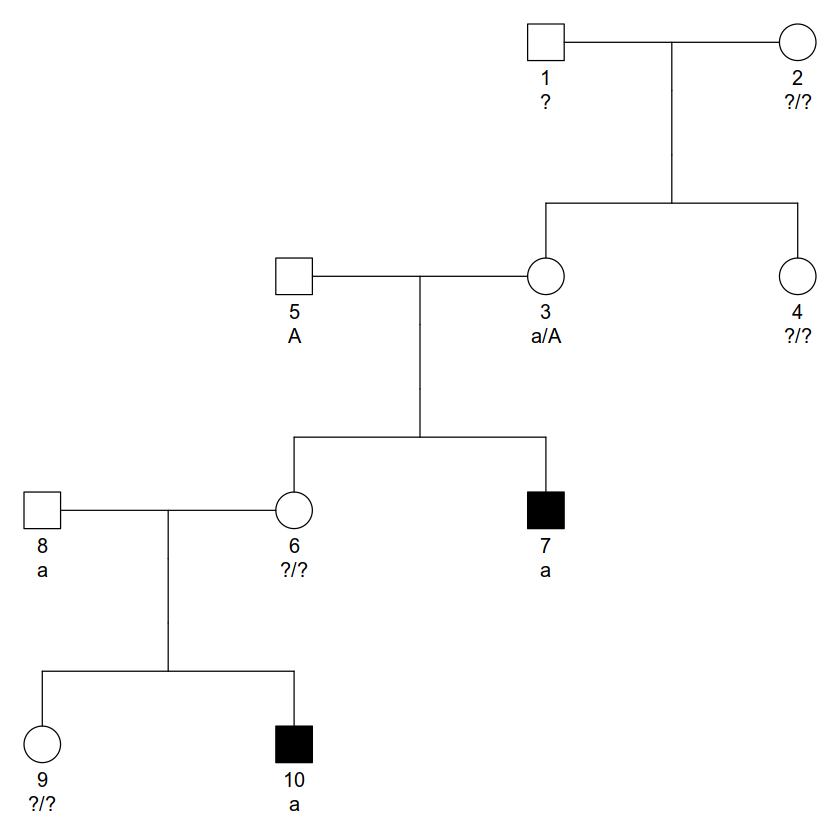

In [6]:
w = nuclearPed(2, sex = 2)
x = addChildren(w, mo = 3, nch = 1, sex = 2)
y = addSon(x, c(3, 5))
z = addChildren(y, mo = 6, nch = 1, sex = 2)
a = addSon(z, c(6, 8))

# Affected members
aff = c(7, 10)
m = marker(a, chrom='X', geno = c(NA, NA, "a/A", NA, "A", NA, "a", "a", NA, "a"), afreq = c(a = 0.001, A = 0.999))
#m = marker(dd, chrom='X', geno = c("a", NA, NA, "a", "A", NA, "a"), afreq = c(a = 0.001, A = 0.999))


plot(a, aff=aff, marker = m, sep="/", showEmpty = T, missing = "?")

In [7]:
sapply(1:10, function(i) oneMarkerDistribution(a, ids = c(i), partialmarker=m, verbose = F))

[[1]]
  a   A 
0.5 0.5 

[[2]]
   a/a    a/A    A/A 
0.0005 0.5000 0.4995 

[[3]]
a/a a/A A/A 
  0   1   0 

[[4]]
    a/a     a/A     A/A 
0.00025 0.75000 0.24975 

[[5]]
a A 
0 1 

[[6]]
a/a a/A A/A 
  0   1   0 

[[7]]
a A 
1 0 

[[8]]
a A 
1 0 

[[9]]
a/a a/A A/A 
0.5 0.5 0.0 

[[10]]
a A 
1 0

Same results as with *mendelprob.pl*.

# Rhonda

Bennett 2010, p. 319-322, Fig. A.3.

Father: Creating new individual with ID = 11



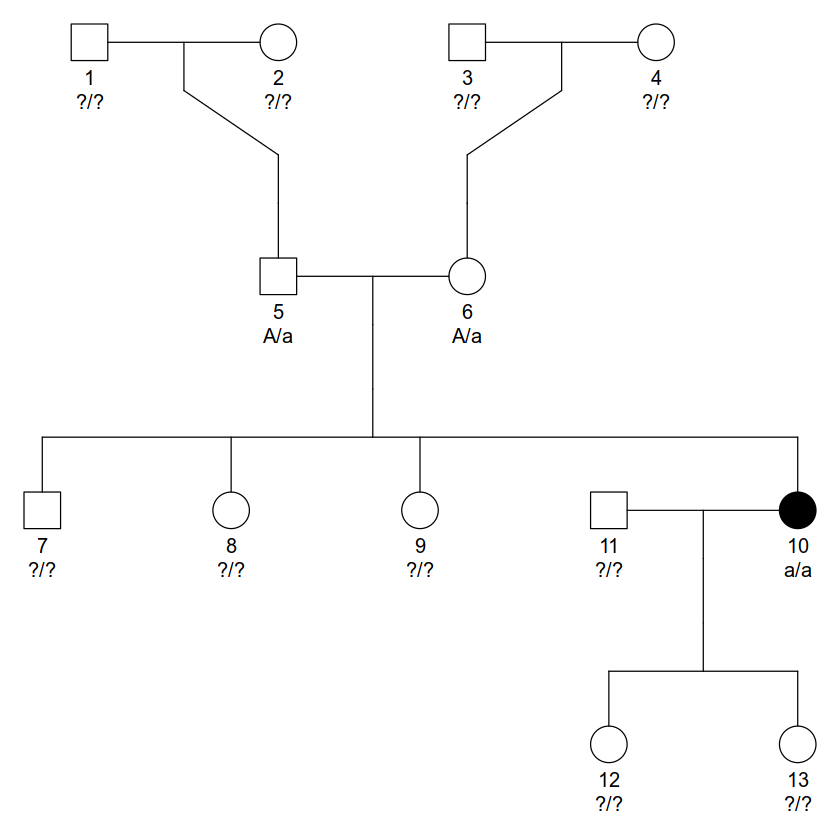

In [10]:
anc = ancestralPed(g = 2)
anc = addChildren(anc, mo = 6, fa = 5, nch = 3, sex = 2)
anc = addChildren(anc, mo = 10, nch = 2, sex = 2)
aff = c(10)
m = marker(anc, geno = c(NA, NA, NA, NA, "A/a", "A/a", NA, NA, NA, "a/a", NA, NA, NA),
              afreq = c(a = 0.001, A = 0.999))
plot(anc, aff=aff, marker=m, sep="/", showEmpty = T, missing = "?")

In [11]:
# pdf output
pdf("./pedigree2.pdf")

# plot
plot(anc, aff=aff, marker = m, sep="/", showEmpty = T, missing = "?")

# stop pdf output
dev.off()

png 
  2

In [12]:
sapply(1:13, function(i) oneMarkerDistribution(anc, ids = c(i), partialmarker=m, verbose = F))

a/a,0.0005,0.0005,0.0005,0.0005,0,0,0.25,0.25,0.25,1,0.000001,0.001,0.001
a/A,0.5000,0.5000,0.5000,0.5000,1,1,0.50,0.50,0.50,0,0.001998,0.999,0.999
A/A,0.4995,0.4995,0.4995,0.4995,0,0,0.25,0.25,0.25,0,0.998001,0.000,0.000


Same results as in mendelprob.pl. Results of Table 1.

LaTeX conversion.

In [22]:
library(xtable)
tolatex <- sapply(1:13, function(i) oneMarkerDistribution(anc, ids = c(i), partialmarker=m, verbose = F))

print(xtable(tolatex, type = "latex", display = rep("s",ncol(tolatex)+1)), file = "filename.tex")

Warning message in formatC(x = c(5e-04, 0.5, 0.4995), format = "s", digits = 2, :
“conversion automatique de l'argument en "character" pour format="s"”
Warning message in formatC(x = c(5e-04, 0.5, 0.4995), format = "s", digits = 2, :
“conversion automatique de l'argument en "character" pour format="s"”
Warning message in formatC(x = c(5e-04, 0.5, 0.4995), format = "s", digits = 2, :
“conversion automatique de l'argument en "character" pour format="s"”
Warning message in formatC(x = c(5e-04, 0.5, 0.4995), format = "s", digits = 2, :
“conversion automatique de l'argument en "character" pour format="s"”
Warning message in formatC(x = c(0, 1, 0), format = "s", digits = 2, decimal.mark = "."):
“conversion automatique de l'argument en "character" pour format="s"”
Warning message in formatC(x = c(0, 1, 0), format = "s", digits = 2, decimal.mark = "."):
“conversion automatique de l'argument en "character" pour format="s"”
Warning message in formatC(x = c(0.25, 0.5, 0.25), format = "s", digits 

# Huntington's disease

Figure 1 from Gusella et al, 1983, leftmost branch.

Genotypes here are directly taken from *mendelprob.pl*.

Father: Creating new individual with ID = 4

Father: Creating new individual with ID = 6

Father: Creating new individual with ID = 8

Changing sex of spouses as well: 8



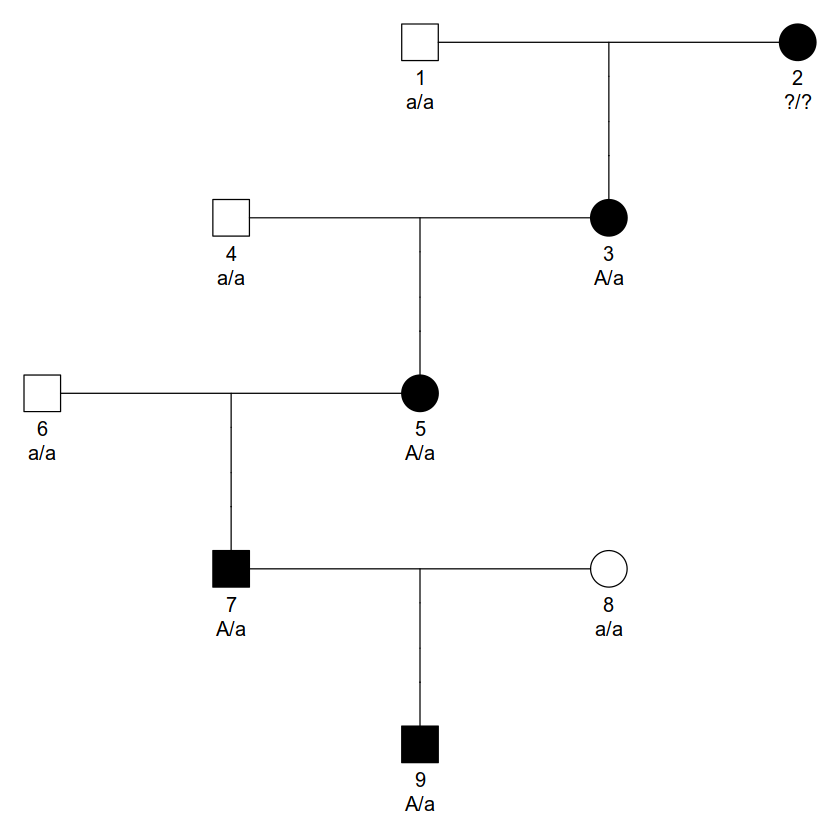

In [13]:
# Pedigree and marker
w = nuclearPed(1, sex = 2)
x = addChildren(w, mo = 3, nch = 1, sex = 2)
#y = addSon(x, c(3, 4))
z = addChildren(x, mo = 5, nch = 1, sex = 2)
d = addChildren(z, mo = 7, nch = 1, sex = 1)
d = swapSex(d, ids=7)
# Affected members
aff = c(2,3,5, 7, 9)
m = marker(d, geno = c("a/a", NA, "A/a", "a/a", "A/a", "a/a", "A/a", "a/a", "A/a"),
              afreq = c(A = 0.0001, a = 0.9999))

# Plot
plot(d, aff=aff, marker = m, sep="/", showEmpty = T, missing = "?")

In [4]:
# pdf output
pdf("./pedigree3.pdf")

# plot
plot(d, aff=aff, marker = m, sep="/", showEmpty = T, missing = "?")

# stop pdf output
dev.off()

png 
  2

In [83]:
sapply(1:9, function(i) oneMarkerDistribution(d, ids = c(i), partialmarker=m, verbose = F))

a/a,1,0.0000,0,1,0,1,0,1,0
a/A,0,0.9999,1,0,1,0,1,0,1
A/A,0,0.0001,0,0,0,0,0,0,0
